In [303]:
%autosave 5
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Autosaving every 5 seconds


LSTM is the memory cell to carry information in the form of gradient.

1. LSTM Allow Past information to reinjected at a later time. 
2. Process one element at a time and retain a memory (state) of previous sequence
3. Forget gate -> Discarding information,  Input gate -> Input, Output gate -> Output Predictions
4. As the time moves in a sentence, dependency between the first sentence and last sentence reduces, LSTM manages by forget gate    weights (E.g : FG = 0.9 in 10 steps 0.9^10= 0.348(35% remains))

In Text, each letter is generated based on previous texts 


Inspired from - https://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/

In [131]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ml-app/DATA_DESIGN/code-envs/python/text_class/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [132]:
# Requesting some data from the http://www.patentsview.org/querydev/
# If you wan't to try, download the dataset and specify the path matches based on your testing environment

import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline
from keras.models import Sequential

In [133]:
# simple example to learn a alphabet
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

In [134]:
# Fixing the random seed for reproducibility
np.random.seed(7)

In [135]:
# Raw dataset
data = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# char to int and int to char
char_to_int = dict((c, i) for i, c in enumerate(data)) #mapping the characters to numbers
int_to_char = dict((i, c) for i, c in enumerate(data)) #mapping the numbers to characters

In [136]:
# Start from the first character

seq_length = 3
dataX = []
dataY = []
for i in range(0, len(data) - seq_length):  # i upto 0-24 (i,e) 25 
    seq_in = data[i:i + seq_length]
    seq_out = data[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])

print(seq_in, '->', seq_out)   # Just printing the last mapping for visibility

WXY -> Z


In [137]:
# LSTM input structure   Samples, Time steps, Features

X = numpy.reshape(dataX, (len(dataX), seq_length, 1))   # Reshaping to 25,1,1  (index starts at 0)
X.shape
x #array([[0.84615385, 0.88461538, 0.92307692]])   dataX, (len(dataX), seq_length, 1 )


array([[[0.84615385, 0.88461538, 0.92307692]]])

In [138]:
# Normalizing the data
X = X / float(len(data))

In [139]:
# Considering it as Sequence classification problem, each characters represent different task

# one hot encode output variable
Y = np_utils.to_categorical(dataY)   # one-hot encoding of Categorical variables
Y.shape
# Now, the dataset is ready to different LSTM models

(23, 26)

In [140]:
# Simple LSTM to predict next character in data

model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))   # 32 output units
model.add(Dense(Y.shape[1], activation ='softmax')) # Softmax for prediction outputs to multiple class  

# Multiclass classification - so Categorical Cross Entropy 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# epochs - Count of too and fro, batch_size - flow of data, verbose - output representation
model.fit(X, Y, epochs = 500, batch_size=1, verbose = 1)


Epoch 1/500
23/23 [==============================] - 1s 49ms/step - loss: 3.2701 - acc: 0.0000e+00
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 3.2547 - acc: 0.0000e+00
Epoch 3/500
23/23 [==============================] - 0s 5ms/step - loss: 3.2465 - acc: 0.0000e+00
Epoch 4/500
23/23 [==============================] - 0s 5ms/step - loss: 3.2393 - acc: 0.0435
Epoch 5/500
23/23 [==============================] - 0s 5ms/step - loss: 3.2313 - acc: 0.0435
Epoch 6/500
23/23 [==============================] - 0s 5ms/step - loss: 3.2230 - acc: 0.0435
Epoch 7/500
23/23 [==============================] - 0s 4ms/step - loss: 3.2142 - acc: 0.0435
Epoch 8/500
23/23 [==============================] - 0s 4ms/step - loss: 3.2052 - acc: 0.0435
Epoch 9/500
23/23 [==============================] - 0s 4ms/step - loss: 3.1939 - acc: 0.0435
Epoch 10/500
23/23 [==============================] - 0s 4ms/step - loss: 3.1822 - acc: 0.0435
Epoch 11/500
23/23 [==========================

23/23 [==============================] - 0s 5ms/step - loss: 1.6739 - acc: 0.5217
Epoch 88/500
23/23 [==============================] - 0s 5ms/step - loss: 1.6617 - acc: 0.5217
Epoch 89/500
23/23 [==============================] - 0s 4ms/step - loss: 1.6514 - acc: 0.7391
Epoch 90/500
23/23 [==============================] - 0s 4ms/step - loss: 1.6312 - acc: 0.6522
Epoch 91/500
23/23 [==============================] - 0s 4ms/step - loss: 1.6305 - acc: 0.5652
Epoch 92/500
23/23 [==============================] - 0s 4ms/step - loss: 1.6168 - acc: 0.4783
Epoch 93/500
23/23 [==============================] - 0s 4ms/step - loss: 1.6234 - acc: 0.4348
Epoch 94/500
23/23 [==============================] - 0s 4ms/step - loss: 1.5955 - acc: 0.5652
Epoch 95/500
23/23 [==============================] - 0s 4ms/step - loss: 1.5925 - acc: 0.6087
Epoch 96/500
23/23 [==============================] - 0s 4ms/step - loss: 1.5844 - acc: 0.6087
Epoch 97/500
23/23 [==============================] - 0s 4ms/st

23/23 [==============================] - 0s 4ms/step - loss: 0.7110 - acc: 1.0000
Epoch 258/500
23/23 [==============================] - 0s 4ms/step - loss: 0.7014 - acc: 0.9565
Epoch 259/500
23/23 [==============================] - 0s 4ms/step - loss: 0.7015 - acc: 1.0000
Epoch 260/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6875 - acc: 0.9565
Epoch 261/500
23/23 [==============================] - 0s 5ms/step - loss: 0.6907 - acc: 0.9565
Epoch 262/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6787 - acc: 0.9565
Epoch 263/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6736 - acc: 1.0000
Epoch 264/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6768 - acc: 1.0000
Epoch 265/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6726 - acc: 0.9565
Epoch 266/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6683 - acc: 0.9565
Epoch 267/500
23/23 [==============================] -

23/23 [==============================] - 0s 4ms/step - loss: 0.2757 - acc: 1.0000
Epoch 428/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2734 - acc: 1.0000
Epoch 429/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2724 - acc: 1.0000
Epoch 430/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2748 - acc: 1.0000
Epoch 431/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2775 - acc: 1.0000
Epoch 432/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2815 - acc: 1.0000
Epoch 433/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2672 - acc: 1.0000
Epoch 434/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2616 - acc: 1.0000
Epoch 435/500
23/23 [==============================] - 0s 4ms/step - loss: 0.2653 - acc: 1.0000
Epoch 436/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2606 - acc: 1.0000
Epoch 437/500
23/23 [==============================] -

In [141]:
# Performance of the model

scores = model.evaluate(X, Y, verbose=0)
print("Accuracy : ", scores[1] *100 )

Accuracy :  100.0


In [143]:
# Testing the model

for cha in dataX:
    x = np.reshape(cha, (1, len(cha), 1))  # reshaping every char
    x = x / float(len(data))  # Normalizing
    pred = model.predict(x, verbose = 0)   # Predicting based on the model
    index = numpy.argmax(pred)             # find the index with maximum accuracy
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in cha]   # input sequence based on the number of characters
    print(seq_in, '->', result)    # It shows that the W, X, Y are not learned well

['A', 'B', 'C'] -> D
['B', 'C', 'D'] -> E
['C', 'D', 'E'] -> F
['D', 'E', 'F'] -> G
['E', 'F', 'G'] -> H
['F', 'G', 'H'] -> I
['G', 'H', 'I'] -> J
['H', 'I', 'J'] -> K
['I', 'J', 'K'] -> L
['J', 'K', 'L'] -> M
['K', 'L', 'M'] -> N
['L', 'M', 'N'] -> O
['M', 'N', 'O'] -> P
['N', 'O', 'P'] -> Q
['O', 'P', 'Q'] -> R
['P', 'Q', 'R'] -> S
['Q', 'R', 'S'] -> T
['R', 'S', 'T'] -> U
['S', 'T', 'U'] -> V
['T', 'U', 'V'] -> W
['U', 'V', 'W'] -> X
['V', 'W', 'X'] -> Y
['W', 'X', 'Y'] -> Z


We got some poor results, because that LSTM don't have any context to learn. Each input-output shown in random order. Network resets after each pattern. 

So Lets try to give some sequence for better learning.

Just go to the start of this notebook, replace the seq_length to 3

Small lift in performance but still LSTM with window method. This is misuse of LSTM network by poor framing. 
Sequence of letters are time steps of one feature than one time step of separate features.
More context is provided but not more sequences.

numpy.reshape(dataX, (len(dataX), 1, seq_length))   # doesn't work well   More context
numpy.reshape(dataX, (len(dataX), seq_length, 1 ))  # Works much better   More Sequences

In [144]:
# Keras using the Batch LSTM

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences



np.random.seed(7)



In [145]:
# dataset
alpha = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# mapping of characters
char_to_int = dict((c, i) for i, c in enumerate(alpha))
int_to_char = dict((i, c) for i, c in enumerate(alpha))

# dataset of input output pairs
seq_len =1 
dataX = []
dataY =  []

In [146]:
for i in range(0, len(alpha) - seq_len, 1):
    seq_in = alpha[i : i + seq_len]
    seq_out = alpha[i + seq_len]
    dataX.append([char_to_int[cha] for cha in seq_in])
    dataY.append(char_to_int[seq_out])
    print(seq_in, '->', seq_out)

A -> B
B -> C
C -> D
D -> E
E -> F
F -> G
G -> H
H -> I
I -> J
J -> K
K -> L
L -> M
M -> N
N -> O
O -> P
P -> Q
Q -> R
R -> S
S -> T
T -> U
U -> V
V -> W
W -> X
X -> Y
Y -> Z


In [161]:
# convert pad sequences
X = pad_sequences(dataX, maxlen=seq_len, dtype='float32')

In [162]:
# Reshape
X = np.reshape(dataX, (X.shape[0], seq_len, 1))

In [163]:
X = X/float(len(alpha))

In [164]:
# One hot encode
y = np_utils.to_categorical(dataY)

In [169]:
# Creating and fitting the model
model = Sequential()
model.add(LSTM(16, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation ='softmax'))

In [170]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X,y, epochs= 5000, batch_size=len(dataX), verbose=2, shuffle=False)

Epoch 1/5000
 - 1s - loss: 3.2600 - acc: 0.0400
Epoch 2/5000
 - 0s - loss: 3.2597 - acc: 0.0400
Epoch 3/5000
 - 0s - loss: 3.2594 - acc: 0.0400
Epoch 4/5000
 - 0s - loss: 3.2592 - acc: 0.0400
Epoch 5/5000
 - 0s - loss: 3.2589 - acc: 0.0400
Epoch 6/5000
 - 0s - loss: 3.2586 - acc: 0.0400
Epoch 7/5000
 - 0s - loss: 3.2583 - acc: 0.0400
Epoch 8/5000
 - 0s - loss: 3.2580 - acc: 0.0400
Epoch 9/5000
 - 0s - loss: 3.2578 - acc: 0.0400
Epoch 10/5000
 - 0s - loss: 3.2575 - acc: 0.0400
Epoch 11/5000
 - 0s - loss: 3.2572 - acc: 0.0400
Epoch 12/5000
 - 0s - loss: 3.2569 - acc: 0.0400
Epoch 13/5000
 - 0s - loss: 3.2566 - acc: 0.0400
Epoch 14/5000
 - 0s - loss: 3.2564 - acc: 0.0400
Epoch 15/5000
 - 0s - loss: 3.2561 - acc: 0.0400
Epoch 16/5000
 - 0s - loss: 3.2558 - acc: 0.0400
Epoch 17/5000
 - 0s - loss: 3.2555 - acc: 0.0400
Epoch 18/5000
 - 0s - loss: 3.2552 - acc: 0.0400
Epoch 19/5000
 - 0s - loss: 3.2549 - acc: 0.0400
Epoch 20/5000
 - 0s - loss: 3.2547 - acc: 0.0400
Epoch 21/5000
 - 0s - loss: 3

 - 0s - loss: 3.1724 - acc: 0.0400
Epoch 168/5000
 - 0s - loss: 3.1714 - acc: 0.0400
Epoch 169/5000
 - 0s - loss: 3.1704 - acc: 0.0400
Epoch 170/5000
 - 0s - loss: 3.1693 - acc: 0.0400
Epoch 171/5000
 - 0s - loss: 3.1683 - acc: 0.0400
Epoch 172/5000
 - 0s - loss: 3.1673 - acc: 0.0400
Epoch 173/5000
 - 0s - loss: 3.1662 - acc: 0.0400
Epoch 174/5000
 - 0s - loss: 3.1651 - acc: 0.0400
Epoch 175/5000
 - 0s - loss: 3.1641 - acc: 0.0400
Epoch 176/5000
 - 0s - loss: 3.1630 - acc: 0.0400
Epoch 177/5000
 - 0s - loss: 3.1619 - acc: 0.0400
Epoch 178/5000
 - 0s - loss: 3.1608 - acc: 0.0400
Epoch 179/5000
 - 0s - loss: 3.1597 - acc: 0.0400
Epoch 180/5000
 - 0s - loss: 3.1586 - acc: 0.0400
Epoch 181/5000
 - 0s - loss: 3.1575 - acc: 0.0400
Epoch 182/5000
 - 0s - loss: 3.1564 - acc: 0.0400
Epoch 183/5000
 - 0s - loss: 3.1553 - acc: 0.0400
Epoch 184/5000
 - 0s - loss: 3.1541 - acc: 0.0400
Epoch 185/5000
 - 0s - loss: 3.1530 - acc: 0.0400
Epoch 186/5000
 - 0s - loss: 3.1518 - acc: 0.0400
Epoch 187/5000


 - 0s - loss: 2.9200 - acc: 0.1200
Epoch 332/5000
 - 0s - loss: 2.9181 - acc: 0.1200
Epoch 333/5000
 - 0s - loss: 2.9163 - acc: 0.1200
Epoch 334/5000
 - 0s - loss: 2.9145 - acc: 0.1200
Epoch 335/5000
 - 0s - loss: 2.9127 - acc: 0.1200
Epoch 336/5000
 - 0s - loss: 2.9109 - acc: 0.1200
Epoch 337/5000
 - 0s - loss: 2.9091 - acc: 0.1200
Epoch 338/5000
 - 0s - loss: 2.9072 - acc: 0.1200
Epoch 339/5000
 - 0s - loss: 2.9054 - acc: 0.1200
Epoch 340/5000
 - 0s - loss: 2.9036 - acc: 0.1200
Epoch 341/5000
 - 0s - loss: 2.9018 - acc: 0.1200
Epoch 342/5000
 - 0s - loss: 2.9000 - acc: 0.1200
Epoch 343/5000
 - 0s - loss: 2.8982 - acc: 0.1200
Epoch 344/5000
 - 0s - loss: 2.8964 - acc: 0.1200
Epoch 345/5000
 - 0s - loss: 2.8945 - acc: 0.1200
Epoch 346/5000
 - 0s - loss: 2.8927 - acc: 0.1200
Epoch 347/5000
 - 0s - loss: 2.8909 - acc: 0.1200
Epoch 348/5000
 - 0s - loss: 2.8891 - acc: 0.1200
Epoch 349/5000
 - 0s - loss: 2.8873 - acc: 0.1200
Epoch 350/5000
 - 0s - loss: 2.8855 - acc: 0.1200
Epoch 351/5000


 - 0s - loss: 2.6485 - acc: 0.2000
Epoch 496/5000
 - 0s - loss: 2.6470 - acc: 0.2000
Epoch 497/5000
 - 0s - loss: 2.6456 - acc: 0.2000
Epoch 498/5000
 - 0s - loss: 2.6442 - acc: 0.2000
Epoch 499/5000
 - 0s - loss: 2.6427 - acc: 0.2000
Epoch 500/5000
 - 0s - loss: 2.6413 - acc: 0.2000
Epoch 501/5000
 - 0s - loss: 2.6399 - acc: 0.2000
Epoch 502/5000
 - 0s - loss: 2.6384 - acc: 0.2000
Epoch 503/5000
 - 0s - loss: 2.6370 - acc: 0.2000
Epoch 504/5000
 - 0s - loss: 2.6356 - acc: 0.2000
Epoch 505/5000
 - 0s - loss: 2.6342 - acc: 0.2000
Epoch 506/5000
 - 0s - loss: 2.6327 - acc: 0.2000
Epoch 507/5000
 - 0s - loss: 2.6313 - acc: 0.2000
Epoch 508/5000
 - 0s - loss: 2.6299 - acc: 0.2000
Epoch 509/5000
 - 0s - loss: 2.6285 - acc: 0.2000
Epoch 510/5000
 - 0s - loss: 2.6271 - acc: 0.2000
Epoch 511/5000
 - 0s - loss: 2.6257 - acc: 0.2000
Epoch 512/5000
 - 0s - loss: 2.6243 - acc: 0.2000
Epoch 513/5000
 - 0s - loss: 2.6229 - acc: 0.2000
Epoch 514/5000
 - 0s - loss: 2.6215 - acc: 0.2000
Epoch 515/5000


 - 0s - loss: 2.4384 - acc: 0.2800
Epoch 660/5000
 - 0s - loss: 2.4372 - acc: 0.2800
Epoch 661/5000
 - 0s - loss: 2.4361 - acc: 0.2800
Epoch 662/5000
 - 0s - loss: 2.4349 - acc: 0.2800
Epoch 663/5000
 - 0s - loss: 2.4338 - acc: 0.2800
Epoch 664/5000
 - 0s - loss: 2.4327 - acc: 0.2800
Epoch 665/5000
 - 0s - loss: 2.4315 - acc: 0.2800
Epoch 666/5000
 - 0s - loss: 2.4304 - acc: 0.3200
Epoch 667/5000
 - 0s - loss: 2.4292 - acc: 0.3200
Epoch 668/5000
 - 0s - loss: 2.4281 - acc: 0.3200
Epoch 669/5000
 - 0s - loss: 2.4270 - acc: 0.3200
Epoch 670/5000
 - 0s - loss: 2.4258 - acc: 0.3200
Epoch 671/5000
 - 0s - loss: 2.4247 - acc: 0.3200
Epoch 672/5000
 - 0s - loss: 2.4235 - acc: 0.3200
Epoch 673/5000
 - 0s - loss: 2.4224 - acc: 0.3200
Epoch 674/5000
 - 0s - loss: 2.4213 - acc: 0.3200
Epoch 675/5000
 - 0s - loss: 2.4202 - acc: 0.3200
Epoch 676/5000
 - 0s - loss: 2.4190 - acc: 0.3200
Epoch 677/5000
 - 0s - loss: 2.4179 - acc: 0.3200
Epoch 678/5000
 - 0s - loss: 2.4168 - acc: 0.3200
Epoch 679/5000


 - 0s - loss: 2.2645 - acc: 0.3600
Epoch 824/5000
 - 0s - loss: 2.2635 - acc: 0.3600
Epoch 825/5000
 - 0s - loss: 2.2625 - acc: 0.3600
Epoch 826/5000
 - 0s - loss: 2.2615 - acc: 0.3600
Epoch 827/5000
 - 0s - loss: 2.2606 - acc: 0.3600
Epoch 828/5000
 - 0s - loss: 2.2596 - acc: 0.3600
Epoch 829/5000
 - 0s - loss: 2.2586 - acc: 0.3600
Epoch 830/5000
 - 0s - loss: 2.2576 - acc: 0.3600
Epoch 831/5000
 - 0s - loss: 2.2567 - acc: 0.3600
Epoch 832/5000
 - 0s - loss: 2.2557 - acc: 0.3600
Epoch 833/5000
 - 0s - loss: 2.2547 - acc: 0.3600
Epoch 834/5000
 - 0s - loss: 2.2538 - acc: 0.3600
Epoch 835/5000
 - 0s - loss: 2.2528 - acc: 0.3600
Epoch 836/5000
 - 0s - loss: 2.2518 - acc: 0.3600
Epoch 837/5000
 - 0s - loss: 2.2509 - acc: 0.3600
Epoch 838/5000
 - 0s - loss: 2.2499 - acc: 0.3600
Epoch 839/5000
 - 0s - loss: 2.2489 - acc: 0.3600
Epoch 840/5000
 - 0s - loss: 2.2480 - acc: 0.3600
Epoch 841/5000
 - 0s - loss: 2.2470 - acc: 0.3600
Epoch 842/5000
 - 0s - loss: 2.2460 - acc: 0.3600
Epoch 843/5000


 - 0s - loss: 2.1183 - acc: 0.5200
Epoch 988/5000
 - 0s - loss: 2.1175 - acc: 0.5200
Epoch 989/5000
 - 0s - loss: 2.1168 - acc: 0.5200
Epoch 990/5000
 - 0s - loss: 2.1160 - acc: 0.5200
Epoch 991/5000
 - 0s - loss: 2.1152 - acc: 0.5200
Epoch 992/5000
 - 0s - loss: 2.1144 - acc: 0.5200
Epoch 993/5000
 - 0s - loss: 2.1136 - acc: 0.5200
Epoch 994/5000
 - 0s - loss: 2.1128 - acc: 0.5200
Epoch 995/5000
 - 0s - loss: 2.1120 - acc: 0.5200
Epoch 996/5000
 - 0s - loss: 2.1112 - acc: 0.5200
Epoch 997/5000
 - 0s - loss: 2.1105 - acc: 0.5200
Epoch 998/5000
 - 0s - loss: 2.1097 - acc: 0.5200
Epoch 999/5000
 - 0s - loss: 2.1089 - acc: 0.5200
Epoch 1000/5000
 - 0s - loss: 2.1081 - acc: 0.5200
Epoch 1001/5000
 - 0s - loss: 2.1073 - acc: 0.5200
Epoch 1002/5000
 - 0s - loss: 2.1065 - acc: 0.5200
Epoch 1003/5000
 - 0s - loss: 2.1058 - acc: 0.5200
Epoch 1004/5000
 - 0s - loss: 2.1050 - acc: 0.5200
Epoch 1005/5000
 - 0s - loss: 2.1042 - acc: 0.5200
Epoch 1006/5000
 - 0s - loss: 2.1034 - acc: 0.5200
Epoch 10

 - 0s - loss: 2.0019 - acc: 0.6800
Epoch 1149/5000
 - 0s - loss: 2.0012 - acc: 0.6800
Epoch 1150/5000
 - 0s - loss: 2.0005 - acc: 0.6800
Epoch 1151/5000
 - 0s - loss: 1.9998 - acc: 0.6800
Epoch 1152/5000
 - 0s - loss: 1.9992 - acc: 0.6800
Epoch 1153/5000
 - 0s - loss: 1.9985 - acc: 0.6800
Epoch 1154/5000
 - 0s - loss: 1.9978 - acc: 0.6800
Epoch 1155/5000
 - 0s - loss: 1.9971 - acc: 0.6800
Epoch 1156/5000
 - 0s - loss: 1.9965 - acc: 0.6800
Epoch 1157/5000
 - 0s - loss: 1.9958 - acc: 0.6800
Epoch 1158/5000
 - 0s - loss: 1.9951 - acc: 0.6800
Epoch 1159/5000
 - 0s - loss: 1.9944 - acc: 0.6800
Epoch 1160/5000
 - 0s - loss: 1.9938 - acc: 0.6800
Epoch 1161/5000
 - 0s - loss: 1.9931 - acc: 0.6800
Epoch 1162/5000
 - 0s - loss: 1.9924 - acc: 0.6800
Epoch 1163/5000
 - 0s - loss: 1.9918 - acc: 0.6800
Epoch 1164/5000
 - 0s - loss: 1.9911 - acc: 0.6800
Epoch 1165/5000
 - 0s - loss: 1.9904 - acc: 0.6800
Epoch 1166/5000
 - 0s - loss: 1.9898 - acc: 0.6800
Epoch 1167/5000
 - 0s - loss: 1.9891 - acc: 0.6

Epoch 1309/5000
 - 0s - loss: 1.9005 - acc: 0.7200
Epoch 1310/5000
 - 0s - loss: 1.8999 - acc: 0.7200
Epoch 1311/5000
 - 0s - loss: 1.8993 - acc: 0.7200
Epoch 1312/5000
 - 0s - loss: 1.8987 - acc: 0.7200
Epoch 1313/5000
 - 0s - loss: 1.8982 - acc: 0.7200
Epoch 1314/5000
 - 0s - loss: 1.8976 - acc: 0.7200
Epoch 1315/5000
 - 0s - loss: 1.8970 - acc: 0.7200
Epoch 1316/5000
 - 0s - loss: 1.8965 - acc: 0.7200
Epoch 1317/5000
 - 0s - loss: 1.8959 - acc: 0.7200
Epoch 1318/5000
 - 0s - loss: 1.8953 - acc: 0.7200
Epoch 1319/5000
 - 0s - loss: 1.8948 - acc: 0.7200
Epoch 1320/5000
 - 0s - loss: 1.8942 - acc: 0.7200
Epoch 1321/5000
 - 0s - loss: 1.8936 - acc: 0.7200
Epoch 1322/5000
 - 0s - loss: 1.8930 - acc: 0.7200
Epoch 1323/5000
 - 0s - loss: 1.8925 - acc: 0.7200
Epoch 1324/5000
 - 0s - loss: 1.8919 - acc: 0.7200
Epoch 1325/5000
 - 0s - loss: 1.8913 - acc: 0.7200
Epoch 1326/5000
 - 0s - loss: 1.8908 - acc: 0.7200
Epoch 1327/5000
 - 0s - loss: 1.8902 - acc: 0.7200
Epoch 1328/5000
 - 0s - loss: 1

Epoch 1470/5000
 - 0s - loss: 1.8159 - acc: 0.8000
Epoch 1471/5000
 - 0s - loss: 1.8154 - acc: 0.8000
Epoch 1472/5000
 - 0s - loss: 1.8149 - acc: 0.8000
Epoch 1473/5000
 - 0s - loss: 1.8144 - acc: 0.8000
Epoch 1474/5000
 - 0s - loss: 1.8139 - acc: 0.8000
Epoch 1475/5000
 - 0s - loss: 1.8135 - acc: 0.8000
Epoch 1476/5000
 - 0s - loss: 1.8130 - acc: 0.8000
Epoch 1477/5000
 - 0s - loss: 1.8125 - acc: 0.8000
Epoch 1478/5000
 - 0s - loss: 1.8120 - acc: 0.8000
Epoch 1479/5000
 - 0s - loss: 1.8115 - acc: 0.8000
Epoch 1480/5000
 - 0s - loss: 1.8111 - acc: 0.8000
Epoch 1481/5000
 - 0s - loss: 1.8106 - acc: 0.8000
Epoch 1482/5000
 - 0s - loss: 1.8101 - acc: 0.8000
Epoch 1483/5000
 - 0s - loss: 1.8096 - acc: 0.8000
Epoch 1484/5000
 - 0s - loss: 1.8092 - acc: 0.8000
Epoch 1485/5000
 - 0s - loss: 1.8087 - acc: 0.8000
Epoch 1486/5000
 - 0s - loss: 1.8082 - acc: 0.8000
Epoch 1487/5000
 - 0s - loss: 1.8077 - acc: 0.8000
Epoch 1488/5000
 - 0s - loss: 1.8073 - acc: 0.8000
Epoch 1489/5000
 - 0s - loss: 1

Epoch 1631/5000
 - 0s - loss: 1.7423 - acc: 0.8400
Epoch 1632/5000
 - 0s - loss: 1.7419 - acc: 0.8400
Epoch 1633/5000
 - 0s - loss: 1.7415 - acc: 0.8400
Epoch 1634/5000
 - 0s - loss: 1.7410 - acc: 0.8400
Epoch 1635/5000
 - 0s - loss: 1.7406 - acc: 0.8400
Epoch 1636/5000
 - 0s - loss: 1.7402 - acc: 0.8400
Epoch 1637/5000
 - 0s - loss: 1.7397 - acc: 0.8400
Epoch 1638/5000
 - 0s - loss: 1.7393 - acc: 0.8400
Epoch 1639/5000
 - 0s - loss: 1.7389 - acc: 0.8400
Epoch 1640/5000
 - 0s - loss: 1.7384 - acc: 0.8400
Epoch 1641/5000
 - 0s - loss: 1.7380 - acc: 0.8400
Epoch 1642/5000
 - 0s - loss: 1.7376 - acc: 0.8400
Epoch 1643/5000
 - 0s - loss: 1.7371 - acc: 0.8400
Epoch 1644/5000
 - 0s - loss: 1.7367 - acc: 0.8400
Epoch 1645/5000
 - 0s - loss: 1.7363 - acc: 0.8400
Epoch 1646/5000
 - 0s - loss: 1.7358 - acc: 0.8400
Epoch 1647/5000
 - 0s - loss: 1.7354 - acc: 0.8400
Epoch 1648/5000
 - 0s - loss: 1.7350 - acc: 0.8400
Epoch 1649/5000
 - 0s - loss: 1.7345 - acc: 0.8400
Epoch 1650/5000
 - 0s - loss: 1

Epoch 1792/5000
 - 0s - loss: 1.6750 - acc: 0.8400
Epoch 1793/5000
 - 0s - loss: 1.6746 - acc: 0.8400
Epoch 1794/5000
 - 0s - loss: 1.6742 - acc: 0.8400
Epoch 1795/5000
 - 0s - loss: 1.6738 - acc: 0.8400
Epoch 1796/5000
 - 0s - loss: 1.6734 - acc: 0.8400
Epoch 1797/5000
 - 0s - loss: 1.6730 - acc: 0.8400
Epoch 1798/5000
 - 0s - loss: 1.6726 - acc: 0.8400
Epoch 1799/5000
 - 0s - loss: 1.6723 - acc: 0.8400
Epoch 1800/5000
 - 0s - loss: 1.6719 - acc: 0.8400
Epoch 1801/5000
 - 0s - loss: 1.6715 - acc: 0.8400
Epoch 1802/5000
 - 0s - loss: 1.6711 - acc: 0.8400
Epoch 1803/5000
 - 0s - loss: 1.6707 - acc: 0.8400
Epoch 1804/5000
 - 0s - loss: 1.6703 - acc: 0.8400
Epoch 1805/5000
 - 0s - loss: 1.6699 - acc: 0.8400
Epoch 1806/5000
 - 0s - loss: 1.6695 - acc: 0.8400
Epoch 1807/5000
 - 0s - loss: 1.6691 - acc: 0.8400
Epoch 1808/5000
 - 0s - loss: 1.6687 - acc: 0.8400
Epoch 1809/5000
 - 0s - loss: 1.6683 - acc: 0.8400
Epoch 1810/5000
 - 0s - loss: 1.6679 - acc: 0.8400
Epoch 1811/5000
 - 0s - loss: 1

Epoch 1953/5000
 - 0s - loss: 1.6140 - acc: 0.8400
Epoch 1954/5000
 - 0s - loss: 1.6136 - acc: 0.8400
Epoch 1955/5000
 - 0s - loss: 1.6132 - acc: 0.8400
Epoch 1956/5000
 - 0s - loss: 1.6129 - acc: 0.8400
Epoch 1957/5000
 - 0s - loss: 1.6125 - acc: 0.8400
Epoch 1958/5000
 - 0s - loss: 1.6122 - acc: 0.8400
Epoch 1959/5000
 - 0s - loss: 1.6118 - acc: 0.8400
Epoch 1960/5000
 - 0s - loss: 1.6114 - acc: 0.8400
Epoch 1961/5000
 - 0s - loss: 1.6111 - acc: 0.8400
Epoch 1962/5000
 - 0s - loss: 1.6107 - acc: 0.8400
Epoch 1963/5000
 - 0s - loss: 1.6104 - acc: 0.8400
Epoch 1964/5000
 - 0s - loss: 1.6100 - acc: 0.8400
Epoch 1965/5000
 - 0s - loss: 1.6096 - acc: 0.8400
Epoch 1966/5000
 - 0s - loss: 1.6093 - acc: 0.8400
Epoch 1967/5000
 - 0s - loss: 1.6089 - acc: 0.8400
Epoch 1968/5000
 - 0s - loss: 1.6086 - acc: 0.8400
Epoch 1969/5000
 - 0s - loss: 1.6082 - acc: 0.8400
Epoch 1970/5000
 - 0s - loss: 1.6079 - acc: 0.8400
Epoch 1971/5000
 - 0s - loss: 1.6075 - acc: 0.8400
Epoch 1972/5000
 - 0s - loss: 1

Epoch 2114/5000
 - 0s - loss: 1.5593 - acc: 0.8400
Epoch 2115/5000
 - 0s - loss: 1.5590 - acc: 0.8400
Epoch 2116/5000
 - 0s - loss: 1.5587 - acc: 0.8400
Epoch 2117/5000
 - 0s - loss: 1.5583 - acc: 0.8400
Epoch 2118/5000
 - 0s - loss: 1.5580 - acc: 0.8400
Epoch 2119/5000
 - 0s - loss: 1.5577 - acc: 0.8400
Epoch 2120/5000
 - 0s - loss: 1.5574 - acc: 0.8400
Epoch 2121/5000
 - 0s - loss: 1.5570 - acc: 0.8400
Epoch 2122/5000
 - 0s - loss: 1.5567 - acc: 0.8400
Epoch 2123/5000
 - 0s - loss: 1.5564 - acc: 0.8400
Epoch 2124/5000
 - 0s - loss: 1.5561 - acc: 0.8400
Epoch 2125/5000
 - 0s - loss: 1.5558 - acc: 0.8400
Epoch 2126/5000
 - 0s - loss: 1.5554 - acc: 0.8400
Epoch 2127/5000
 - 0s - loss: 1.5551 - acc: 0.8400
Epoch 2128/5000
 - 0s - loss: 1.5548 - acc: 0.8400
Epoch 2129/5000
 - 0s - loss: 1.5545 - acc: 0.8400
Epoch 2130/5000
 - 0s - loss: 1.5542 - acc: 0.8400
Epoch 2131/5000
 - 0s - loss: 1.5538 - acc: 0.8400
Epoch 2132/5000
 - 0s - loss: 1.5535 - acc: 0.8400
Epoch 2133/5000
 - 0s - loss: 1

Epoch 2275/5000
 - 0s - loss: 1.5093 - acc: 0.8400
Epoch 2276/5000
 - 0s - loss: 1.5090 - acc: 0.8400
Epoch 2277/5000
 - 0s - loss: 1.5087 - acc: 0.8400
Epoch 2278/5000
 - 0s - loss: 1.5084 - acc: 0.8400
Epoch 2279/5000
 - 0s - loss: 1.5081 - acc: 0.8400
Epoch 2280/5000
 - 0s - loss: 1.5078 - acc: 0.8400
Epoch 2281/5000
 - 0s - loss: 1.5075 - acc: 0.8400
Epoch 2282/5000
 - 0s - loss: 1.5072 - acc: 0.8400
Epoch 2283/5000
 - 0s - loss: 1.5069 - acc: 0.8400
Epoch 2284/5000
 - 0s - loss: 1.5066 - acc: 0.8400
Epoch 2285/5000
 - 0s - loss: 1.5063 - acc: 0.8400
Epoch 2286/5000
 - 0s - loss: 1.5060 - acc: 0.8800
Epoch 2287/5000
 - 0s - loss: 1.5057 - acc: 0.8800
Epoch 2288/5000
 - 0s - loss: 1.5055 - acc: 0.8800
Epoch 2289/5000
 - 0s - loss: 1.5052 - acc: 0.8800
Epoch 2290/5000
 - 0s - loss: 1.5049 - acc: 0.8800
Epoch 2291/5000
 - 0s - loss: 1.5046 - acc: 0.8800
Epoch 2292/5000
 - 0s - loss: 1.5043 - acc: 0.8800
Epoch 2293/5000
 - 0s - loss: 1.5040 - acc: 0.8800
Epoch 2294/5000
 - 0s - loss: 1

Epoch 2436/5000
 - 0s - loss: 1.4625 - acc: 0.9200
Epoch 2437/5000
 - 0s - loss: 1.4623 - acc: 0.9200
Epoch 2438/5000
 - 0s - loss: 1.4620 - acc: 0.9200
Epoch 2439/5000
 - 0s - loss: 1.4617 - acc: 0.9200
Epoch 2440/5000
 - 0s - loss: 1.4614 - acc: 0.9200
Epoch 2441/5000
 - 0s - loss: 1.4611 - acc: 0.9200
Epoch 2442/5000
 - 0s - loss: 1.4608 - acc: 0.9200
Epoch 2443/5000
 - 0s - loss: 1.4606 - acc: 0.9200
Epoch 2444/5000
 - 0s - loss: 1.4603 - acc: 0.9200
Epoch 2445/5000
 - 0s - loss: 1.4600 - acc: 0.9200
Epoch 2446/5000
 - 0s - loss: 1.4597 - acc: 0.9200
Epoch 2447/5000
 - 0s - loss: 1.4594 - acc: 0.9200
Epoch 2448/5000
 - 0s - loss: 1.4591 - acc: 0.9200
Epoch 2449/5000
 - 0s - loss: 1.4589 - acc: 0.9200
Epoch 2450/5000
 - 0s - loss: 1.4586 - acc: 0.9200
Epoch 2451/5000
 - 0s - loss: 1.4583 - acc: 0.9200
Epoch 2452/5000
 - 0s - loss: 1.4580 - acc: 0.9200
Epoch 2453/5000
 - 0s - loss: 1.4577 - acc: 0.9200
Epoch 2454/5000
 - 0s - loss: 1.4575 - acc: 0.9200
Epoch 2455/5000
 - 0s - loss: 1

Epoch 2597/5000
 - 0s - loss: 1.4180 - acc: 0.9200
Epoch 2598/5000
 - 0s - loss: 1.4177 - acc: 0.9200
Epoch 2599/5000
 - 0s - loss: 1.4175 - acc: 0.9200
Epoch 2600/5000
 - 0s - loss: 1.4172 - acc: 0.9200
Epoch 2601/5000
 - 0s - loss: 1.4169 - acc: 0.9200
Epoch 2602/5000
 - 0s - loss: 1.4167 - acc: 0.9200
Epoch 2603/5000
 - 0s - loss: 1.4164 - acc: 0.9200
Epoch 2604/5000
 - 0s - loss: 1.4161 - acc: 0.9200
Epoch 2605/5000
 - 0s - loss: 1.4159 - acc: 0.9200
Epoch 2606/5000
 - 0s - loss: 1.4156 - acc: 0.9200
Epoch 2607/5000
 - 0s - loss: 1.4153 - acc: 0.9200
Epoch 2608/5000
 - 0s - loss: 1.4151 - acc: 0.9200
Epoch 2609/5000
 - 0s - loss: 1.4148 - acc: 0.9200
Epoch 2610/5000
 - 0s - loss: 1.4145 - acc: 0.9200
Epoch 2611/5000
 - 0s - loss: 1.4143 - acc: 0.9200
Epoch 2612/5000
 - 0s - loss: 1.4140 - acc: 0.9200
Epoch 2613/5000
 - 0s - loss: 1.4137 - acc: 0.9200
Epoch 2614/5000
 - 0s - loss: 1.4135 - acc: 0.9200
Epoch 2615/5000
 - 0s - loss: 1.4132 - acc: 0.9200
Epoch 2616/5000
 - 0s - loss: 1

Epoch 2758/5000
 - 0s - loss: 1.3754 - acc: 0.9200
Epoch 2759/5000
 - 0s - loss: 1.3752 - acc: 0.9200
Epoch 2760/5000
 - 0s - loss: 1.3749 - acc: 0.9200
Epoch 2761/5000
 - 0s - loss: 1.3747 - acc: 0.9200
Epoch 2762/5000
 - 0s - loss: 1.3744 - acc: 0.9200
Epoch 2763/5000
 - 0s - loss: 1.3741 - acc: 0.9200
Epoch 2764/5000
 - 0s - loss: 1.3739 - acc: 0.9200
Epoch 2765/5000
 - 0s - loss: 1.3736 - acc: 0.9200
Epoch 2766/5000
 - 0s - loss: 1.3734 - acc: 0.9200
Epoch 2767/5000
 - 0s - loss: 1.3731 - acc: 0.9200
Epoch 2768/5000
 - 0s - loss: 1.3728 - acc: 0.9200
Epoch 2769/5000
 - 0s - loss: 1.3726 - acc: 0.9200
Epoch 2770/5000
 - 0s - loss: 1.3723 - acc: 0.9200
Epoch 2771/5000
 - 0s - loss: 1.3721 - acc: 0.9200
Epoch 2772/5000
 - 0s - loss: 1.3718 - acc: 0.9200
Epoch 2773/5000
 - 0s - loss: 1.3715 - acc: 0.9200
Epoch 2774/5000
 - 0s - loss: 1.3713 - acc: 0.9200
Epoch 2775/5000
 - 0s - loss: 1.3710 - acc: 0.9200
Epoch 2776/5000
 - 0s - loss: 1.3708 - acc: 0.9200
Epoch 2777/5000
 - 0s - loss: 1

Epoch 2919/5000
 - 0s - loss: 1.3348 - acc: 0.9200
Epoch 2920/5000
 - 0s - loss: 1.3345 - acc: 0.9200
Epoch 2921/5000
 - 0s - loss: 1.3343 - acc: 0.9200
Epoch 2922/5000
 - 0s - loss: 1.3340 - acc: 0.9200
Epoch 2923/5000
 - 0s - loss: 1.3338 - acc: 0.9200
Epoch 2924/5000
 - 0s - loss: 1.3335 - acc: 0.9200
Epoch 2925/5000
 - 0s - loss: 1.3333 - acc: 0.9200
Epoch 2926/5000
 - 0s - loss: 1.3331 - acc: 0.9200
Epoch 2927/5000
 - 0s - loss: 1.3328 - acc: 0.9200
Epoch 2928/5000
 - 0s - loss: 1.3326 - acc: 0.9200
Epoch 2929/5000
 - 0s - loss: 1.3323 - acc: 0.9200
Epoch 2930/5000
 - 0s - loss: 1.3321 - acc: 0.9200
Epoch 2931/5000
 - 0s - loss: 1.3318 - acc: 0.9200
Epoch 2932/5000
 - 0s - loss: 1.3316 - acc: 0.9200
Epoch 2933/5000
 - 0s - loss: 1.3313 - acc: 0.9200
Epoch 2934/5000
 - 0s - loss: 1.3311 - acc: 0.9200
Epoch 2935/5000
 - 0s - loss: 1.3308 - acc: 0.9200
Epoch 2936/5000
 - 0s - loss: 1.3306 - acc: 0.9200
Epoch 2937/5000
 - 0s - loss: 1.3303 - acc: 0.9200
Epoch 2938/5000
 - 0s - loss: 1

Epoch 3080/5000
 - 0s - loss: 1.2956 - acc: 0.9200
Epoch 3081/5000
 - 0s - loss: 1.2953 - acc: 0.9200
Epoch 3082/5000
 - 0s - loss: 1.2951 - acc: 0.9200
Epoch 3083/5000
 - 0s - loss: 1.2948 - acc: 0.9200
Epoch 3084/5000
 - 0s - loss: 1.2946 - acc: 0.9200
Epoch 3085/5000
 - 0s - loss: 1.2944 - acc: 0.9200
Epoch 3086/5000
 - 0s - loss: 1.2941 - acc: 0.9200
Epoch 3087/5000
 - 0s - loss: 1.2939 - acc: 0.9200
Epoch 3088/5000
 - 0s - loss: 1.2936 - acc: 0.9200
Epoch 3089/5000
 - 0s - loss: 1.2934 - acc: 0.9200
Epoch 3090/5000
 - 0s - loss: 1.2932 - acc: 0.9200
Epoch 3091/5000
 - 0s - loss: 1.2929 - acc: 0.9200
Epoch 3092/5000
 - 0s - loss: 1.2927 - acc: 0.9200
Epoch 3093/5000
 - 0s - loss: 1.2924 - acc: 0.9200
Epoch 3094/5000
 - 0s - loss: 1.2922 - acc: 0.9200
Epoch 3095/5000
 - 0s - loss: 1.2920 - acc: 0.9200
Epoch 3096/5000
 - 0s - loss: 1.2917 - acc: 0.9200
Epoch 3097/5000
 - 0s - loss: 1.2915 - acc: 0.9200
Epoch 3098/5000
 - 0s - loss: 1.2912 - acc: 0.9200
Epoch 3099/5000
 - 0s - loss: 1

Epoch 3241/5000
 - 0s - loss: 1.2575 - acc: 0.9200
Epoch 3242/5000
 - 0s - loss: 1.2573 - acc: 0.9200
Epoch 3243/5000
 - 0s - loss: 1.2570 - acc: 0.9200
Epoch 3244/5000
 - 0s - loss: 1.2568 - acc: 0.9200
Epoch 3245/5000
 - 0s - loss: 1.2566 - acc: 0.9200
Epoch 3246/5000
 - 0s - loss: 1.2564 - acc: 0.9200
Epoch 3247/5000
 - 0s - loss: 1.2561 - acc: 0.9200
Epoch 3248/5000
 - 0s - loss: 1.2559 - acc: 0.9200
Epoch 3249/5000
 - 0s - loss: 1.2557 - acc: 0.9200
Epoch 3250/5000
 - 0s - loss: 1.2554 - acc: 0.9200
Epoch 3251/5000
 - 0s - loss: 1.2552 - acc: 0.9200
Epoch 3252/5000
 - 0s - loss: 1.2550 - acc: 0.9200
Epoch 3253/5000
 - 0s - loss: 1.2547 - acc: 0.9200
Epoch 3254/5000
 - 0s - loss: 1.2545 - acc: 0.9200
Epoch 3255/5000
 - 0s - loss: 1.2543 - acc: 0.9200
Epoch 3256/5000
 - 0s - loss: 1.2540 - acc: 0.9200
Epoch 3257/5000
 - 0s - loss: 1.2538 - acc: 0.9200
Epoch 3258/5000
 - 0s - loss: 1.2536 - acc: 0.9200
Epoch 3259/5000
 - 0s - loss: 1.2533 - acc: 0.9200
Epoch 3260/5000
 - 0s - loss: 1

Epoch 3402/5000
 - 0s - loss: 1.2206 - acc: 0.9200
Epoch 3403/5000
 - 0s - loss: 1.2203 - acc: 0.9200
Epoch 3404/5000
 - 0s - loss: 1.2201 - acc: 0.9200
Epoch 3405/5000
 - 0s - loss: 1.2199 - acc: 0.9200
Epoch 3406/5000
 - 0s - loss: 1.2196 - acc: 0.9200
Epoch 3407/5000
 - 0s - loss: 1.2194 - acc: 0.9200
Epoch 3408/5000
 - 0s - loss: 1.2192 - acc: 0.9200
Epoch 3409/5000
 - 0s - loss: 1.2190 - acc: 0.9200
Epoch 3410/5000
 - 0s - loss: 1.2187 - acc: 0.9200
Epoch 3411/5000
 - 0s - loss: 1.2185 - acc: 0.9200
Epoch 3412/5000
 - 0s - loss: 1.2183 - acc: 0.9200
Epoch 3413/5000
 - 0s - loss: 1.2181 - acc: 0.9200
Epoch 3414/5000
 - 0s - loss: 1.2178 - acc: 0.9200
Epoch 3415/5000
 - 0s - loss: 1.2176 - acc: 0.9200
Epoch 3416/5000
 - 0s - loss: 1.2174 - acc: 0.9200
Epoch 3417/5000
 - 0s - loss: 1.2172 - acc: 0.9200
Epoch 3418/5000
 - 0s - loss: 1.2169 - acc: 0.9200
Epoch 3419/5000
 - 0s - loss: 1.2167 - acc: 0.9200
Epoch 3420/5000
 - 0s - loss: 1.2165 - acc: 0.9200
Epoch 3421/5000
 - 0s - loss: 1

Epoch 3563/5000
 - 0s - loss: 1.1846 - acc: 0.9200
Epoch 3564/5000
 - 0s - loss: 1.1844 - acc: 0.9200
Epoch 3565/5000
 - 0s - loss: 1.1841 - acc: 0.9200
Epoch 3566/5000
 - 0s - loss: 1.1839 - acc: 0.9200
Epoch 3567/5000
 - 0s - loss: 1.1837 - acc: 0.9200
Epoch 3568/5000
 - 0s - loss: 1.1835 - acc: 0.9200
Epoch 3569/5000
 - 0s - loss: 1.1833 - acc: 0.9200
Epoch 3570/5000
 - 0s - loss: 1.1830 - acc: 0.9200
Epoch 3571/5000
 - 0s - loss: 1.1828 - acc: 0.9200
Epoch 3572/5000
 - 0s - loss: 1.1826 - acc: 0.9200
Epoch 3573/5000
 - 0s - loss: 1.1824 - acc: 0.9200
Epoch 3574/5000
 - 0s - loss: 1.1822 - acc: 0.9200
Epoch 3575/5000
 - 0s - loss: 1.1819 - acc: 0.9200
Epoch 3576/5000
 - 0s - loss: 1.1817 - acc: 0.9200
Epoch 3577/5000
 - 0s - loss: 1.1815 - acc: 0.9200
Epoch 3578/5000
 - 0s - loss: 1.1813 - acc: 0.9200
Epoch 3579/5000
 - 0s - loss: 1.1811 - acc: 0.9200
Epoch 3580/5000
 - 0s - loss: 1.1808 - acc: 0.9200
Epoch 3581/5000
 - 0s - loss: 1.1806 - acc: 0.9200
Epoch 3582/5000
 - 0s - loss: 1

Epoch 3724/5000
 - 0s - loss: 1.1496 - acc: 0.9200
Epoch 3725/5000
 - 0s - loss: 1.1494 - acc: 0.9200
Epoch 3726/5000
 - 0s - loss: 1.1491 - acc: 0.9200
Epoch 3727/5000
 - 0s - loss: 1.1489 - acc: 0.9200
Epoch 3728/5000
 - 0s - loss: 1.1487 - acc: 0.9200
Epoch 3729/5000
 - 0s - loss: 1.1485 - acc: 0.9200
Epoch 3730/5000
 - 0s - loss: 1.1483 - acc: 0.9200
Epoch 3731/5000
 - 0s - loss: 1.1481 - acc: 0.9200
Epoch 3732/5000
 - 0s - loss: 1.1478 - acc: 0.9200
Epoch 3733/5000
 - 0s - loss: 1.1476 - acc: 0.9200
Epoch 3734/5000
 - 0s - loss: 1.1474 - acc: 0.9200
Epoch 3735/5000
 - 0s - loss: 1.1472 - acc: 0.9200
Epoch 3736/5000
 - 0s - loss: 1.1470 - acc: 0.9200
Epoch 3737/5000
 - 0s - loss: 1.1468 - acc: 0.9200
Epoch 3738/5000
 - 0s - loss: 1.1466 - acc: 0.9200
Epoch 3739/5000
 - 0s - loss: 1.1463 - acc: 0.9200
Epoch 3740/5000
 - 0s - loss: 1.1461 - acc: 0.9200
Epoch 3741/5000
 - 0s - loss: 1.1459 - acc: 0.9200
Epoch 3742/5000
 - 0s - loss: 1.1457 - acc: 0.9200
Epoch 3743/5000
 - 0s - loss: 1

Epoch 3885/5000
 - 0s - loss: 1.1154 - acc: 0.9600
Epoch 3886/5000
 - 0s - loss: 1.1152 - acc: 0.9600
Epoch 3887/5000
 - 0s - loss: 1.1150 - acc: 0.9600
Epoch 3888/5000
 - 0s - loss: 1.1148 - acc: 0.9600
Epoch 3889/5000
 - 0s - loss: 1.1146 - acc: 0.9600
Epoch 3890/5000
 - 0s - loss: 1.1144 - acc: 0.9600
Epoch 3891/5000
 - 0s - loss: 1.1142 - acc: 0.9600
Epoch 3892/5000
 - 0s - loss: 1.1140 - acc: 0.9600
Epoch 3893/5000
 - 0s - loss: 1.1138 - acc: 0.9600
Epoch 3894/5000
 - 0s - loss: 1.1135 - acc: 0.9600
Epoch 3895/5000
 - 0s - loss: 1.1133 - acc: 0.9600
Epoch 3896/5000
 - 0s - loss: 1.1131 - acc: 0.9600
Epoch 3897/5000
 - 0s - loss: 1.1129 - acc: 0.9600
Epoch 3898/5000
 - 0s - loss: 1.1127 - acc: 0.9600
Epoch 3899/5000
 - 0s - loss: 1.1125 - acc: 0.9600
Epoch 3900/5000
 - 0s - loss: 1.1123 - acc: 0.9600
Epoch 3901/5000
 - 0s - loss: 1.1121 - acc: 0.9600
Epoch 3902/5000
 - 0s - loss: 1.1119 - acc: 0.9600
Epoch 3903/5000
 - 0s - loss: 1.1117 - acc: 0.9600
Epoch 3904/5000
 - 0s - loss: 1

Epoch 4046/5000
 - 0s - loss: 1.0821 - acc: 0.9600
Epoch 4047/5000
 - 0s - loss: 1.0819 - acc: 0.9600
Epoch 4048/5000
 - 0s - loss: 1.0817 - acc: 0.9600
Epoch 4049/5000
 - 0s - loss: 1.0815 - acc: 0.9600
Epoch 4050/5000
 - 0s - loss: 1.0813 - acc: 0.9600
Epoch 4051/5000
 - 0s - loss: 1.0811 - acc: 0.9600
Epoch 4052/5000
 - 0s - loss: 1.0809 - acc: 0.9600
Epoch 4053/5000
 - 0s - loss: 1.0807 - acc: 0.9600
Epoch 4054/5000
 - 0s - loss: 1.0805 - acc: 0.9600
Epoch 4055/5000
 - 0s - loss: 1.0803 - acc: 0.9600
Epoch 4056/5000
 - 0s - loss: 1.0801 - acc: 0.9600
Epoch 4057/5000
 - 0s - loss: 1.0799 - acc: 0.9600
Epoch 4058/5000
 - 0s - loss: 1.0797 - acc: 0.9600
Epoch 4059/5000
 - 0s - loss: 1.0795 - acc: 0.9600
Epoch 4060/5000
 - 0s - loss: 1.0793 - acc: 0.9600
Epoch 4061/5000
 - 0s - loss: 1.0791 - acc: 0.9600
Epoch 4062/5000
 - 0s - loss: 1.0789 - acc: 0.9600
Epoch 4063/5000
 - 0s - loss: 1.0787 - acc: 0.9600
Epoch 4064/5000
 - 0s - loss: 1.0785 - acc: 0.9600
Epoch 4065/5000
 - 0s - loss: 1

Epoch 4207/5000
 - 0s - loss: 1.0497 - acc: 0.9600
Epoch 4208/5000
 - 0s - loss: 1.0495 - acc: 0.9600
Epoch 4209/5000
 - 0s - loss: 1.0493 - acc: 0.9600
Epoch 4210/5000
 - 0s - loss: 1.0491 - acc: 0.9600
Epoch 4211/5000
 - 0s - loss: 1.0489 - acc: 0.9600
Epoch 4212/5000
 - 0s - loss: 1.0487 - acc: 0.9600
Epoch 4213/5000
 - 0s - loss: 1.0485 - acc: 0.9600
Epoch 4214/5000
 - 0s - loss: 1.0483 - acc: 0.9600
Epoch 4215/5000
 - 0s - loss: 1.0481 - acc: 0.9600
Epoch 4216/5000
 - 0s - loss: 1.0479 - acc: 0.9600
Epoch 4217/5000
 - 0s - loss: 1.0477 - acc: 0.9600
Epoch 4218/5000
 - 0s - loss: 1.0475 - acc: 0.9600
Epoch 4219/5000
 - 0s - loss: 1.0473 - acc: 0.9600
Epoch 4220/5000
 - 0s - loss: 1.0471 - acc: 0.9600
Epoch 4221/5000
 - 0s - loss: 1.0469 - acc: 0.9600
Epoch 4222/5000
 - 0s - loss: 1.0467 - acc: 0.9600
Epoch 4223/5000
 - 0s - loss: 1.0465 - acc: 0.9600
Epoch 4224/5000
 - 0s - loss: 1.0463 - acc: 0.9600
Epoch 4225/5000
 - 0s - loss: 1.0461 - acc: 0.9600
Epoch 4226/5000
 - 0s - loss: 1

Epoch 4368/5000
 - 0s - loss: 1.0180 - acc: 1.0000
Epoch 4369/5000
 - 0s - loss: 1.0178 - acc: 1.0000
Epoch 4370/5000
 - 0s - loss: 1.0176 - acc: 1.0000
Epoch 4371/5000
 - 0s - loss: 1.0174 - acc: 1.0000
Epoch 4372/5000
 - 0s - loss: 1.0172 - acc: 1.0000
Epoch 4373/5000
 - 0s - loss: 1.0170 - acc: 1.0000
Epoch 4374/5000
 - 0s - loss: 1.0168 - acc: 1.0000
Epoch 4375/5000
 - 0s - loss: 1.0166 - acc: 1.0000
Epoch 4376/5000
 - 0s - loss: 1.0164 - acc: 1.0000
Epoch 4377/5000
 - 0s - loss: 1.0162 - acc: 1.0000
Epoch 4378/5000
 - 0s - loss: 1.0161 - acc: 1.0000
Epoch 4379/5000
 - 0s - loss: 1.0159 - acc: 1.0000
Epoch 4380/5000
 - 0s - loss: 1.0157 - acc: 1.0000
Epoch 4381/5000
 - 0s - loss: 1.0155 - acc: 1.0000
Epoch 4382/5000
 - 0s - loss: 1.0153 - acc: 1.0000
Epoch 4383/5000
 - 0s - loss: 1.0151 - acc: 1.0000
Epoch 4384/5000
 - 0s - loss: 1.0149 - acc: 1.0000
Epoch 4385/5000
 - 0s - loss: 1.0147 - acc: 1.0000
Epoch 4386/5000
 - 0s - loss: 1.0145 - acc: 1.0000
Epoch 4387/5000
 - 0s - loss: 1

Epoch 4529/5000
 - 0s - loss: 0.9871 - acc: 1.0000
Epoch 4530/5000
 - 0s - loss: 0.9869 - acc: 1.0000
Epoch 4531/5000
 - 0s - loss: 0.9868 - acc: 1.0000
Epoch 4532/5000
 - 0s - loss: 0.9866 - acc: 1.0000
Epoch 4533/5000
 - 0s - loss: 0.9864 - acc: 1.0000
Epoch 4534/5000
 - 0s - loss: 0.9862 - acc: 1.0000
Epoch 4535/5000
 - 0s - loss: 0.9860 - acc: 1.0000
Epoch 4536/5000
 - 0s - loss: 0.9858 - acc: 1.0000
Epoch 4537/5000
 - 0s - loss: 0.9856 - acc: 1.0000
Epoch 4538/5000
 - 0s - loss: 0.9854 - acc: 1.0000
Epoch 4539/5000
 - 0s - loss: 0.9852 - acc: 1.0000
Epoch 4540/5000
 - 0s - loss: 0.9851 - acc: 1.0000
Epoch 4541/5000
 - 0s - loss: 0.9849 - acc: 1.0000
Epoch 4542/5000
 - 0s - loss: 0.9847 - acc: 1.0000
Epoch 4543/5000
 - 0s - loss: 0.9845 - acc: 1.0000
Epoch 4544/5000
 - 0s - loss: 0.9843 - acc: 1.0000
Epoch 4545/5000
 - 0s - loss: 0.9841 - acc: 1.0000
Epoch 4546/5000
 - 0s - loss: 0.9839 - acc: 1.0000
Epoch 4547/5000
 - 0s - loss: 0.9837 - acc: 1.0000
Epoch 4548/5000
 - 0s - loss: 0

Epoch 4690/5000
 - 0s - loss: 0.9571 - acc: 1.0000
Epoch 4691/5000
 - 0s - loss: 0.9569 - acc: 1.0000
Epoch 4692/5000
 - 0s - loss: 0.9567 - acc: 1.0000
Epoch 4693/5000
 - 0s - loss: 0.9565 - acc: 1.0000
Epoch 4694/5000
 - 0s - loss: 0.9563 - acc: 1.0000
Epoch 4695/5000
 - 0s - loss: 0.9561 - acc: 1.0000
Epoch 4696/5000
 - 0s - loss: 0.9560 - acc: 1.0000
Epoch 4697/5000
 - 0s - loss: 0.9558 - acc: 1.0000
Epoch 4698/5000
 - 0s - loss: 0.9556 - acc: 1.0000
Epoch 4699/5000
 - 0s - loss: 0.9554 - acc: 1.0000
Epoch 4700/5000
 - 0s - loss: 0.9552 - acc: 1.0000
Epoch 4701/5000
 - 0s - loss: 0.9550 - acc: 1.0000
Epoch 4702/5000
 - 0s - loss: 0.9549 - acc: 1.0000
Epoch 4703/5000
 - 0s - loss: 0.9547 - acc: 1.0000
Epoch 4704/5000
 - 0s - loss: 0.9545 - acc: 1.0000
Epoch 4705/5000
 - 0s - loss: 0.9543 - acc: 1.0000
Epoch 4706/5000
 - 0s - loss: 0.9541 - acc: 1.0000
Epoch 4707/5000
 - 0s - loss: 0.9539 - acc: 1.0000
Epoch 4708/5000
 - 0s - loss: 0.9537 - acc: 1.0000
Epoch 4709/5000
 - 0s - loss: 0

Epoch 4851/5000
 - 0s - loss: 0.9278 - acc: 1.0000
Epoch 4852/5000
 - 0s - loss: 0.9276 - acc: 1.0000
Epoch 4853/5000
 - 0s - loss: 0.9274 - acc: 1.0000
Epoch 4854/5000
 - 0s - loss: 0.9272 - acc: 1.0000
Epoch 4855/5000
 - 0s - loss: 0.9270 - acc: 1.0000
Epoch 4856/5000
 - 0s - loss: 0.9269 - acc: 1.0000
Epoch 4857/5000
 - 0s - loss: 0.9267 - acc: 1.0000
Epoch 4858/5000
 - 0s - loss: 0.9265 - acc: 1.0000
Epoch 4859/5000
 - 0s - loss: 0.9263 - acc: 1.0000
Epoch 4860/5000
 - 0s - loss: 0.9261 - acc: 1.0000
Epoch 4861/5000
 - 0s - loss: 0.9260 - acc: 1.0000
Epoch 4862/5000
 - 0s - loss: 0.9258 - acc: 1.0000
Epoch 4863/5000
 - 0s - loss: 0.9256 - acc: 1.0000
Epoch 4864/5000
 - 0s - loss: 0.9254 - acc: 1.0000
Epoch 4865/5000
 - 0s - loss: 0.9252 - acc: 1.0000
Epoch 4866/5000
 - 0s - loss: 0.9251 - acc: 1.0000
Epoch 4867/5000
 - 0s - loss: 0.9249 - acc: 1.0000
Epoch 4868/5000
 - 0s - loss: 0.9247 - acc: 1.0000
Epoch 4869/5000
 - 0s - loss: 0.9245 - acc: 1.0000
Epoch 4870/5000
 - 0s - loss: 0

In [174]:
scores = model.evaluate(X,y, verbose = 0)
print("Scores ", scores)

Scores  [0.9011154174804688, 1.0]


In [182]:
for pattern in dataX:
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x/float(len(alpha))
    prediction = model.predict(x, verbose = 0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[i] for i in pattern]
    print(seq_in, "->", result)
    
    
# Test for random pattern

for i in range(20):
    pattern_index = np.random.randint(len(dataX))
    pattern = dataX[pattern_index]
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x/ len(alpha)
    pred = model.predict(x, verbose=0)
    index = np.argmax(pred)
    result = int_to_char[index]
    seq_in = [int_to_char[i] for i in pattern]
    print(seq_in, '->', result)

['A'] -> B
['B'] -> C
['C'] -> D
['D'] -> E
['E'] -> F
['F'] -> G
['G'] -> H
['H'] -> I
['I'] -> J
['J'] -> K
['K'] -> L
['L'] -> M
['M'] -> N
['N'] -> O
['O'] -> P
['P'] -> Q
['Q'] -> R
['R'] -> S
['S'] -> T
['T'] -> U
['U'] -> V
['V'] -> W
['W'] -> X
['X'] -> Y
['Y'] -> Z
['Y'] -> Z
['P'] -> Q
['X'] -> Y
['F'] -> G
['J'] -> K
['A'] -> B
['N'] -> O
['D'] -> E
['D'] -> E
['H'] -> I
['F'] -> G
['G'] -> H
['V'] -> W
['Q'] -> R
['C'] -> D
['L'] -> M
['C'] -> D
['E'] -> F
['L'] -> M
['X'] -> Y


    # LSTM for Understanding with digits

In [21]:
import matplotlib.pyplot as plt
from keras.models  import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.model_selection import train_test_split

In [31]:
data = [[[(i*j)/100] for i in range(7)] for j in range(100)]
target = [(i+7)/100 for i in range(100)]

In [32]:
data = np.array(data, dtype=float)
target = np.array(target, dtype = float)

In [33]:
data.shape

(100, 7, 1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 4)

In [35]:
model = Sequential()
model.add(LSTM((3), batch_input_shape= (None, None,1), return_sequences= True))
model.add(LSTM((2), return_sequences=True))
model.add(LSTM((1), return_sequences=False))
model.compile(optimizer ='adam', loss='mean_absolute_percentage_error')

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 3)           60        
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 2)           48        
_________________________________________________________________
lstm_6 (LSTM)                (None, 1)                 16        
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [40]:
his = model.fit(x_train, y_train, epochs = 1000, verbose =0)

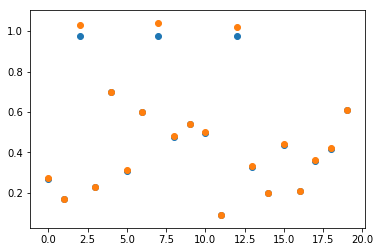

In [41]:
results = model.predict(x_test)
plt.scatter(range(20), results)
plt.scatter(range(20), y_test)

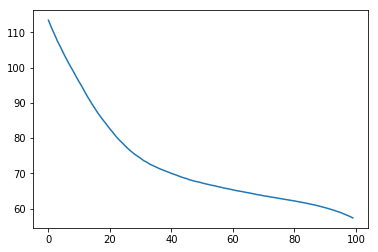

In [39]:
plt.plot(his.history['loss'])

In [10]:
model.predict(x_test[2].reshape(1, x_test[2].shape[0], x_test[2].shape[1]))

array([[0.8445833]], dtype=float32)

In [11]:
a = model.evaluate(x_train, y_train)

80/80 [==============================] - 0s 3ms/step


In [12]:
model.metrics_names

['loss']